In [1]:
#Prabhat Thakur  Date 11/04/2018
#MSDS422 - Assignment-5 
#MNIST dataset benchmark testing for RandomForestClassifier before and after using PCA. 

In [2]:
# import base packages into the namespace for this program
from scipy.io import loadmat
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt

import csv
import time
import numpy as np
import pandas as pd

In [3]:
# Load MNIST dataset from .mat file.

mnist_raw = loadmat("mnist-original.mat")
mnist = {
"data": mnist_raw["data"].T,
"target": mnist_raw["label"][0],
"COL_NAMES": ["label", "data"],
"DESCR": "mldata.org dataset: mnist-original"}

print('mnist dataset \n', mnist)
X, y = mnist['data'], mnist['target']
print('\ndata shape: ', X.shape)
print('target shape: ', y.shape)

mnist dataset 
 {'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'COL_NAMES': ['label', 'data'], 'DESCR': 'mldata.org dataset: mnist-original'}

data shape:  (70000, 784)
target shape:  (70000,)


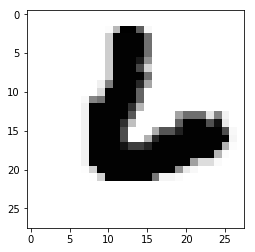


 y[38001] =  6.0


In [4]:
# Display 38,001th image
some_digit = X[38001]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
           interpolation = 'nearest')
plt.axis('on')
plt.show()
print('\n y[38001] = ',y[38001])

In [5]:
# Split the data to 60,000 images as training data and 10,000 as test data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# --- Random Forest Classifier ---
rfClf = RandomForestClassifier(bootstrap = True,n_estimators=100, max_leaf_nodes=10, n_jobs=-1,random_state =42)    

# Record the time it takes to fit the model

# set random number seed 

np.random.seed(seed = 9999)

replications = 10  # repeat the trial ten times
x_time = [] # empty list for storing test results
n = 0  # initialize count
print('--- Time to Fit Random Forest Classifier ---')

while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    rfClf.fit(X_train, y_train)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    x_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", x_time[n], "milliseconds") 
    n = n + 1

# write results to external file 
with open('rf_fit.csv', 'wt') as f:
    writer = csv.writer(f, quoting = csv.QUOTE_NONNUMERIC, dialect = 'excel')
    writer.writerow('x_time')    
    for i in range(replications):
        writer.writerow(([x_time[i],]))

# preliminary analysis for this cell of the design
print(pd.DataFrame(x_time).describe())

y_predict = rfClf.predict(X_test)

# Performance measurement using F1-score
f1Score = f1_score(y_test, y_predict, average='weighted')
print('\nF1 Score: ', f1Score)

--- Time to Fit Random Forest Classifier ---
replication 1 : 14441.48684599468 milliseconds
replication 2 : 12253.320934739055 milliseconds
replication 3 : 12805.390514664825 milliseconds
replication 4 : 11767.337504516043 milliseconds
replication 5 : 11868.048165664923 milliseconds
replication 6 : 11458.113689361844 milliseconds
replication 7 : 11439.802361480602 milliseconds
replication 8 : 11609.236542188057 milliseconds
replication 9 : 11593.082651821205 milliseconds
replication 10 : 11550.971770617793 milliseconds
                  0
count     10.000000
mean   12078.679098
std      931.586988
min    11439.802361
25%    11561.499491
50%    11688.287023
75%    12157.002742
max    14441.486846

F1 Score:  0.7650861676604316


Confusion Matrix :
 [[ 963    1    2    0    0    0    4    5    4    1]
 [   0 1111   11    3    0    0    2    2    6    0]
 [  37   96  759   18    8    0   34   50   23    7]
 [  33   43   23  824    4    5    3   26   26   23]
 [   7   10    7    1  728    0   39   22    9  159]
 [  74   42    7  317   42  233   40   23   50   64]
 [  60   13   31    3   39    5  782    9   16    0]
 [   2   50   36    0    7    0    0  892   11   30]
 [  15   69   20   64   23    1   28   11  695   48]
 [  14   15    6   15   64    0    8   71   13  803]]


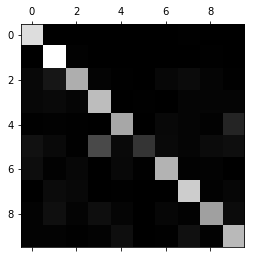

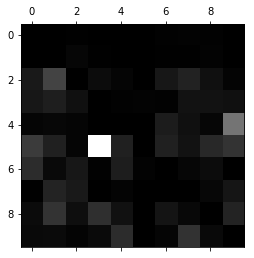

In [6]:
conf_mx = confusion_matrix(y_test, y_predict)
print ('Confusion Matrix :\n',conf_mx)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


In [7]:
# Split the data to 60,000 images as training data and 10,000 as test data using train test split
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size =1/7,random_state =42)

# --- Random Forest Classifier with bootstrap = True and max_features = 'sqrt'---
rfClf1 = RandomForestClassifier(bootstrap = True, max_features = 'sqrt', n_estimators=100, max_leaf_nodes=10, n_jobs=-1,random_state =42)    

# Record the time it takes to fit the model

# set random number seed 

np.random.seed(seed = 9999)

replications = 10  # repeat the trial ten times
x_time = [] # empty list for storing test results
n = 0  # initialize count
print('--- Time to Fit Random Forest Classifier ---')

while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    rfClf1.fit(X_train1, y_train1)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    x_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", x_time[n], "milliseconds") 
    n = n + 1

# preliminary analysis for this cell of the design
print(pd.DataFrame(x_time).describe())

y_predict1 = rfClf1.predict(X_test1)

# Performance measurement using F1-score
f1Score1 = f1_score(y_test1, y_predict1, average='weighted')
print('\nF1 Score on test set: ', f1Score1)

--- Time to Fit Random Forest Classifier ---
replication 1 : 12263.032893224306 milliseconds
replication 2 : 12284.919696521825 milliseconds
replication 3 : 12570.141968009977 milliseconds
replication 4 : 13966.46098137748 milliseconds
replication 5 : 13049.818537130108 milliseconds
replication 6 : 12549.01509179885 milliseconds
replication 7 : 12363.604378099637 milliseconds
replication 8 : 12411.770864124548 milliseconds
replication 9 : 13956.104049660042 milliseconds
replication 10 : 15110.730121194194 milliseconds
                  0
count     10.000000
mean   13052.559858
std      970.215240
min    12263.032893
25%    12375.646000
50%    12559.578530
75%    13729.532672
max    15110.730121

F1 Score on test set:  0.7637213066001748


Confusion Matrix :
 [[ 963    1    2    0    0    0    4    5    4    1]
 [   0 1111   11    3    0    0    2    2    6    0]
 [  37   96  759   18    8    0   34   50   23    7]
 [  33   43   23  824    4    5    3   26   26   23]
 [   7   10    7    1  728    0   39   22    9  159]
 [  74   42    7  317   42  233   40   23   50   64]
 [  60   13   31    3   39    5  782    9   16    0]
 [   2   50   36    0    7    0    0  892   11   30]
 [  15   69   20   64   23    1   28   11  695   48]
 [  14   15    6   15   64    0    8   71   13  803]]


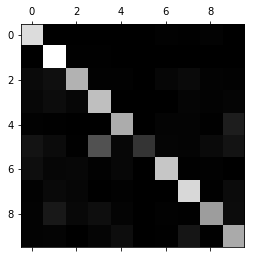

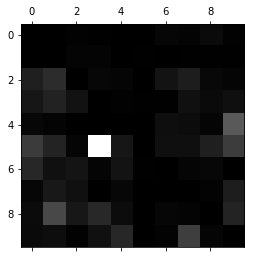

In [8]:
conf_mx1 = confusion_matrix(y_test1, y_predict1)
print ('Confusion Matrix :\n',conf_mx)

plt.matshow(conf_mx1, cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx1.sum(axis=1, keepdims=True)
norm_conf_mx1 = conf_mx1 / row_sums

np.fill_diagonal(norm_conf_mx1, 0)
plt.matshow(norm_conf_mx1, cmap=plt.cm.gray)
plt.show()


In [9]:
# --- PCA ---
# Generate principal components that represent 95 percent of the variability
# in the explanatory variables
pca = PCA(n_components=0.95)

# Runtime to identify the principal components
pca_time = [] # empty list for storing test results
n = 0  # initialize count
print('--- Time to Identify Pricipal Components ---')
while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    X_pca = pca.fit_transform(X) # run on all 70,000 observations
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    pca_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", pca_time[n], "milliseconds") 
    n = n + 1

# write results to external file 
with open('pca_fit.csv', 'wt') as f:
    writer = csv.writer(f, quoting = csv.QUOTE_NONNUMERIC, dialect = 'excel')
    writer.writerow('pca_time')    
    for i in range(replications):
        writer.writerow(([pca_time[i],]))

print(pd.DataFrame(pca_time).describe())

# show summary of pca solution
pca_explained_variance = pca.explained_variance_ratio_
print('\nPrincipal components count:', len(pca_explained_variance))
# -- Results: Dimension is reduced to 154 variables from 784 variables
print('\nProportion of variance explained:', pca_explained_variance)


--- Time to Identify Pricipal Components ---
replication 1 : 13156.679229480744 milliseconds
replication 2 : 12653.401812986544 milliseconds
replication 3 : 12214.086773737961 milliseconds
replication 4 : 12429.406838112129 milliseconds
replication 5 : 12217.119913291981 milliseconds
replication 6 : 14724.339836437082 milliseconds
replication 7 : 13412.936824646067 milliseconds
replication 8 : 14979.084967320261 milliseconds
replication 9 : 12837.346043945217 milliseconds
replication 10 : 13359.5103786908 milliseconds
                  0
count     10.000000
mean   13198.391262
std      973.171857
min    12214.086774
25%    12485.405582
50%    12997.012637
75%    13399.580213
max    14979.084967

Principal components count: 154

Proportion of variance explained: [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214  0.02106689 0.02037553
 0.01707064 0.0169402  0.01583382 0.01486345 0.01319358 0.01279014
 0.01187272 0.01152937 0.01

In [10]:
# Split the reduced data to 60,000 images as training data and 10,000 as test data
X_pca_train, X_pca_test = X_pca[:60000], X_pca[60000:]

# Random Forest Classifier using the principal components
rfClf_pca = RandomForestClassifier(bootstrap = True, n_estimators=100, max_leaf_nodes=10, n_jobs=-1,random_state =42)

# Runtime to identify the principal components
x_pca_time = [] # empty list for storing test results
n = 0  # initialize count
print('--- Time to Fit Random Forest Classifier using Principal Components ---')
while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    rfClf_pca.fit(X_pca_train, y_train)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    x_pca_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", x_pca_time[n], "milliseconds") 
    n = n + 1

# write results to external file 
with open('rf_pca_fit.csv', 'wt') as f:
    writer = csv.writer(f, quoting = csv.QUOTE_NONNUMERIC, dialect = 'excel')
    writer.writerow('x_pca_time')    
    for i in range(replications):
        writer.writerow(([x_pca_time[i],]))
        
print(pd.DataFrame(x_pca_time).describe())

y_predict_pca = rfClf_pca.predict(X_pca_test)

# Performance measurement using F1-score

f1Score_pca = f1_score(y_test, y_predict_pca, average='weighted')
print('\nF1 Score: ', f1Score_pca)

--- Time to Fit Random Forest Classifier using Principal Components ---
replication 1 : 18740.585279337836 milliseconds

replication 2 : 18559.232026143774 milliseconds

replication 3 : 17587.73401320326 milliseconds

replication 4 : 18174.87026636451 milliseconds

replication 5 : 18350.868312148974 milliseconds

replication 6 : 17950.406033435116 milliseconds

replication 7 : 17616.670361611967 milliseconds

replication 8 : 18751.60483791501 milliseconds

replication 9 : 18289.5289355273 milliseconds

replication 10 : 17188.661033927703 milliseconds

                  0
count     10.000000
mean   18121.016110
std      526.499803
min    17188.661034
25%    17700.104280
50%    18232.199601
75%    18507.141098
max    18751.604838

F1 Score:  0.7771608951625412


Confusion Matrix :
 [[ 963    1    2    0    0    0    4    5    4    1]
 [   0 1111   11    3    0    0    2    2    6    0]
 [  37   96  759   18    8    0   34   50   23    7]
 [  33   43   23  824    4    5    3   26   26   23]
 [   7   10    7    1  728    0   39   22    9  159]
 [  74   42    7  317   42  233   40   23   50   64]
 [  60   13   31    3   39    5  782    9   16    0]
 [   2   50   36    0    7    0    0  892   11   30]
 [  15   69   20   64   23    1   28   11  695   48]
 [  14   15    6   15   64    0    8   71   13  803]]


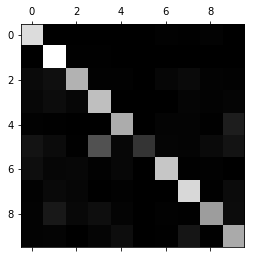

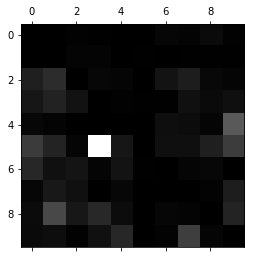

In [11]:
conf_mx1 = confusion_matrix(y_test1, y_predict1)
print ('Confusion Matrix :\n',conf_mx)

plt.matshow(conf_mx1, cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx1.sum(axis=1, keepdims=True)
norm_conf_mx1 = conf_mx1 / row_sums

np.fill_diagonal(norm_conf_mx1, 0)
plt.matshow(norm_conf_mx1, cmap=plt.cm.gray)
plt.show()

In [12]:
# --- PCA on Training Data only (60000 observations)---
# Generate principal components that represent 95 percent of the variability
# in the explanatory variables.
pca = PCA(n_components=0.95)

# Runtime to identify the principal components
pca_time = [] # empty list for storing test results
n = 0  # initialize count
print('--- Time to Identify Pricipal Components ---\n')
while (n < replications): 
    start_time = time.clock()
    X_pca_train = pca.fit_transform(X_train) # run on 60,000 observations
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    pca_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", pca_time[n], "milliseconds") 
    n = n + 1

print(pd.DataFrame(pca_time).describe())

# show summary of pca solution
pca_explained_variance = pca.explained_variance_ratio_
print('\nPrincipal components count:', len(pca_explained_variance))
# -- Results: Dimension is reduced to 154 variables from 784 variables

X_pca_test = pca.transform(X_test)

--- Time to Identify Pricipal Components ---

replication 1 : 12260.136056097508 milliseconds
replication 2 : 11176.466893290013 milliseconds
replication 3 : 11006.552780241009 milliseconds
replication 4 : 11114.746526751333 milliseconds
replication 5 : 11278.20228593953 milliseconds
replication 6 : 11207.07253588205 milliseconds
replication 7 : 11188.826895917486 milliseconds
replication 8 : 10967.3592636384 milliseconds
replication 9 : 11072.986254803482 milliseconds
replication 10 : 10780.228347620436 milliseconds
                  0
count     10.000000
mean   11205.257784
std      397.437445
min    10780.228348
25%    11023.161149
50%    11145.606710
75%    11202.511126
max    12260.136056

Principal components count: 154


In [13]:
# Random Forest Classifier using the principal components
rfClf_pca = RandomForestClassifier(bootstrap = True, n_estimators=100, max_leaf_nodes=10, n_jobs=-1,random_state =42)

# Runtime to identify the principal components
x_pca_time = [] # empty list for storing test results
n = 0  # initialize count
print('--- Time to Fit Random Forest Classifier using Principal Components ---\n')
while (n < replications): 
    start_time = time.clock()
    # generate 1 million random negative binomials and store in a vector
    rfClf_pca.fit(X_pca_train, y_train)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    x_pca_time.append(runtime * 1000)  # report in milliseconds 
    print("replication", n + 1, ":", x_pca_time[n], "milliseconds") 
    n = n + 1
       
print(pd.DataFrame(x_pca_time).describe())

y_predict_pca = rfClf_pca.predict(X_pca_test)

--- Time to Fit Random Forest Classifier using Principal Components ---

replication 1 : 18231.446037376485 milliseconds
replication 2 : 18411.07251946005 milliseconds
replication 3 : 17651.234111735106 milliseconds
replication 4 : 17919.516701152817 milliseconds
replication 5 : 18049.65021184364 milliseconds
replication 6 : 17733.6051170887 milliseconds
replication 7 : 17622.926725128877 milliseconds
replication 8 : 17766.498341380044 milliseconds
replication 9 : 17800.16093539598 milliseconds
replication 10 : 18184.28991362032 milliseconds
                  0
count     10.000000
mean   17937.040061
std      269.786054
min    17622.926725
25%    17741.828423
50%    17859.838818
75%    18150.629988
max    18411.072519



F1 Score:  0.7815999163905832
Confusion Matrix :
 [[ 963    1    2    0    0    0    4    5    4    1]
 [   0 1111   11    3    0    0    2    2    6    0]
 [  37   96  759   18    8    0   34   50   23    7]
 [  33   43   23  824    4    5    3   26   26   23]
 [   7   10    7    1  728    0   39   22    9  159]
 [  74   42    7  317   42  233   40   23   50   64]
 [  60   13   31    3   39    5  782    9   16    0]
 [   2   50   36    0    7    0    0  892   11   30]
 [  15   69   20   64   23    1   28   11  695   48]
 [  14   15    6   15   64    0    8   71   13  803]]


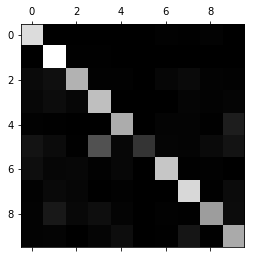

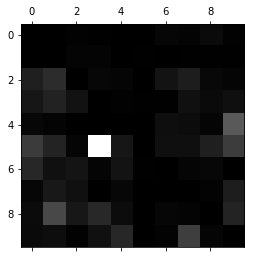

In [14]:
# Performance measurement using F1-score
f1Score_pca = f1_score(y_test, y_predict_pca, average='weighted')
print('\nF1 Score: ', f1Score_pca)

conf_mx1 = confusion_matrix(y_test1, y_predict1)
print ('Confusion Matrix :\n',conf_mx)

plt.matshow(conf_mx1, cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx1.sum(axis=1, keepdims=True)
norm_conf_mx1 = conf_mx1 / row_sums

np.fill_diagonal(norm_conf_mx1, 0)
plt.matshow(norm_conf_mx1, cmap=plt.cm.gray)
plt.show()